In [1]:

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import time
import random
import scipy.stats as stats
from scipy.sparse import *
from lsmc import LMSC_optimize
from visualizingData import *
import pandas as pd
import os
import ast

In [ ]:
loaded_matrix = np.load('.\\artificialData\\artificialRatingsV3.npy', allow_pickle=True).item()
sampled_mask = np.load('.\\artificialData\\mask.npy', allow_pickle=True).item().toarray()
dense_matrix = loaded_matrix.toarray()

In [3]:
dense_matrix.shape

(500, 1000)

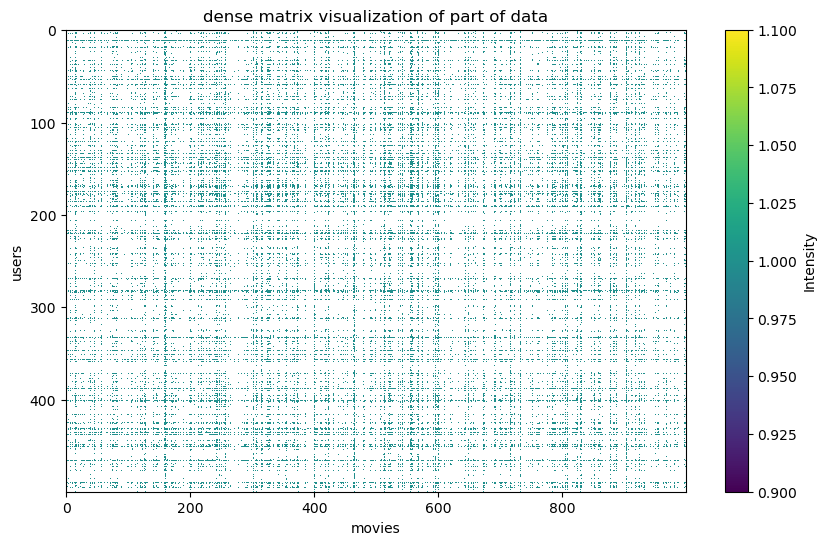

In [24]:
visualizeData(np.where(sampled_mask==0,np.nan,1))

In [4]:
dense_matrix = dense_matrix[:200,:150]
sampled_mask = sampled_mask[:200,:150]

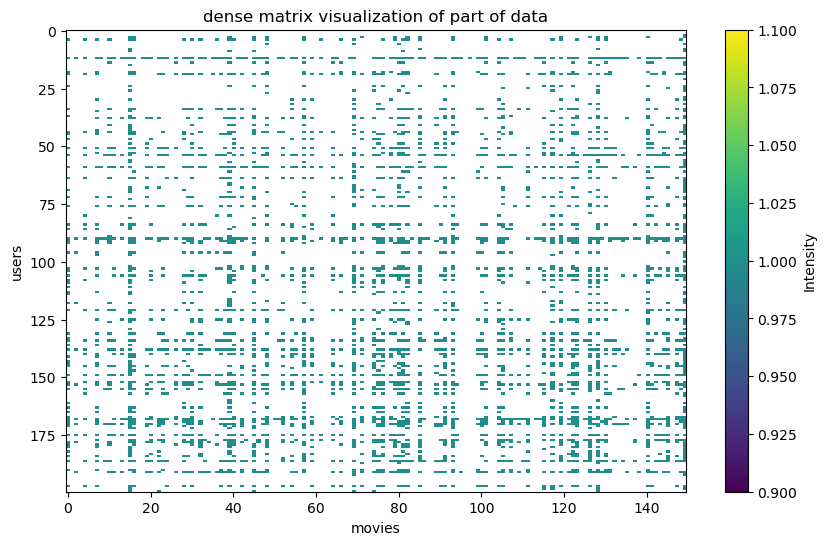

In [26]:
visualizeData(np.where(sampled_mask==0,np.nan,1))

In [5]:
# Matrix dimensions
m, n = dense_matrix.shape

# Initializing matrices and variables
R = dense_matrix  # Original dense matrix
P_init = np.random.rand(m, n)  # Initial guess for matrix P
u_init = np.zeros((m, n))  # Initial values for u
y_init = np.zeros((m, n))  # Initial values for y
s_init = 1  # Initial value for s

# Define ranges for hyperparameters
lambdas = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])  # Regularization parameter λ values
gammas = np.array([0, 0.001, 0.01])  # Step size or learning rate γ values
delta = 1e-2  # Tolerance level for optimization
num_iterations = 100  # Number of iterations for optimization

# Generate rhos for each lambda
rhos = np.round(10*np.arange(.1,3.1, .1))/10

# List to store results
results = []




In [6]:
rhos

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. ])

In [54]:

    
# Iterate over rho values
for rho in rhos: 
    # Iterate over lambda values
    for lambda_ in lambdas:
        # Iterate over gamma values
        
        for gamma in gammas:
            # Calculate epsilon based on matrix size and gamma
            epsilon = m * n * gamma  # Error threshold as defined in the paper
            
            # Print current parameter settings
            print(f"Current settings: gamma = {gamma}, rho = {rho}, lambda = {lambda_}")

            # Run the optimization function with the current parameters
            P_final, Z_final, u_final, y_final, s_final, errors, r_errors = LMSC_optimize(
                rho, lambda_, R, P_init, sampled_mask, u_init, y_init, s_init, delta, epsilon, num_iterations
            )
            
            print(f"Finished w/ settings: gamma = {gamma}, rho = {rho}, lambda = {lambda_}\n")
            # Store the results in a dictionary
            result = {
                'lambda': lambda_,
                'rho': rho,
                'gamma': gamma,
                'errors': errors,
                'relative_errors': r_errors
            }
            results.append(result)


Current settings: gamma = 0.0, rho = 0.1, lambda = 0.1
Is lambda smaller then rho?: False
Finished w/ settings: gamma = 0.0, rho = 0.1, lambda = 0.1

Current settings: gamma = 0.001, rho = 0.1, lambda = 0.1
Is lambda smaller then rho?: False
Finished w/ settings: gamma = 0.001, rho = 0.1, lambda = 0.1

Current settings: gamma = 0.01, rho = 0.1, lambda = 0.1
Is lambda smaller then rho?: False
Finished w/ settings: gamma = 0.01, rho = 0.1, lambda = 0.1

Current settings: gamma = 0.0, rho = 0.1, lambda = 0.2
Is lambda smaller then rho?: False
Finished w/ settings: gamma = 0.0, rho = 0.1, lambda = 0.2

Current settings: gamma = 0.001, rho = 0.1, lambda = 0.2
Is lambda smaller then rho?: False
Finished w/ settings: gamma = 0.001, rho = 0.1, lambda = 0.2

Current settings: gamma = 0.01, rho = 0.1, lambda = 0.2
Is lambda smaller then rho?: False
Finished w/ settings: gamma = 0.01, rho = 0.1, lambda = 0.2

Current settings: gamma = 0.0, rho = 0.1, lambda = 0.3
Is lambda smaller then rho?: Fals

In [55]:
# Assuming 'results' is the list you populated with dictionaries as shown earlier
results_df = pd.DataFrame(results)  # Convert the results list to a DataFrame

# Define the directory name
directory = 'convergence_results'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Define the path to save the DataFrame
file_path = os.path.join(directory, 'convergence_resultsv1.csv')

# Save the DataFrame as a CSV file
results_df.to_csv(file_path, index=False)

print(f"Results saved to {file_path}")


Results saved to convergence_results\convergence_resultsv1.csv


In [ ]:


# Define the directory and file path
directory = 'convergence_results'
file_path = os.path.join(directory, 'convergence_resultsv1.csv')

# Load the DataFrame from the CSV file
results_df = pd.read_csv(file_path)

# Display the loaded DataFrame
print(results_df.head())  # Show the first few rows of the DataFrame


   lambda  rho  gamma                                             errors  \
0     0.1  0.1  0.000  [[1.8516961322197427, 1.3584203002705382], [2....   
1     0.1  0.1  0.001  [[1.8516961322197427, 1.3584203002705382], [2....   
2     0.1  0.1  0.010  [[1.8516961322197427, 1.3584203002705382], [2....   
3     0.2  0.1  0.000  [[1.8516961322197427, 1.3584203002705382], [2....   
4     0.2  0.1  0.001  [[1.8516961322197427, 1.3584203002705382], [2....   

                                     relative_errors  
0  [(3.8917355476968214, 1.9329862697031648, 5.82...  
1  [(3.8917355476968214, 1.9329862697031648, 5.82...  
2  [(3.8917355476968214, 1.9329862697031648, 5.82...  
3  [(3.8917355476968214, 1.9329862697031648, 5.82...  
4  [(3.8917355476968214, 1.9329862697031648, 5.82...  


In [57]:

# Suppose you have specific values for lambda, rho, and gamma
lambda_ = 0.1
rho = 0.10
gamma = 0.001
# Example of selecting errors for specific lambda, rho, and gamma
specific_errors = results_df[
    (results_df['lambda'] == lambda_) &
    (results_df['rho'] == rho) &
    (results_df['gamma'] == gamma)
]
# Convert 'errors' and 'relative_errors' columns to NumPy arrays
errors_array = specific_errors['errors'].to_numpy()
relative_errors_array = specific_errors['relative_errors'].to_numpy()



In [58]:
results_df[results_df['rho'] == 0.7]

,lambda,rho,gamma,errors,relative_errors
180,0.1,0.7,0.000,"[[0.3619688118582163, 0.24008764347671582], [0...","[(0.10558345223224262, 0.07636421024167217, 0...."
181,0.1,0.7,0.001,"[[0.3619688118582163, 0.24008764347671582], [0...","[(0.10558345223224262, 0.07636421024167217, 0...."
182,0.1,0.7,0.010,"[[0.3619688118582163, 0.24008764347671582], [0...","[(0.10558345223224262, 0.07636421024167217, 0...."
183,0.2,0.7,0.000,"[[0.3619688118582163, 0.24008764347671582], [0...","[(0.10558345223224262, 0.07636421024167217, 0...."
184,0.2,0.7,0.001,"[[0.3619688118582163, 0.24008764347671582], [0...","[(0.10558345223224262, 0.07636421024167217, 0...."
185,0.2,0.7,0.010,"[[0.3619688118582163, 0.24008764347671582], [0...","[(0.10558345223224262, 0.07636421024167217, 0...."
186,0.3,0.7,0.000,"[[0.3619688118582163, 0.24008764347671582], [0...","[(0.10558345223224262, 0.07636421024167217, 0...."
187,0.3,0.7,0.001,"[[0.3619688118582163, 0.24008764347671582], [0...","[(0.10558345223224262, 0.07636421024167217, 0...."
188,0.3,0.7,0.010,"[[0.3619688118582163, 0.24008764347671582], [0...","[(0.10558345223224262, 0.07636421024167217, 0...."
189,0.4,0.7,0.000,"[[0.3619688118582163, 0.24008764347671582], [0...","[(0.10558345223224262, 0.07636421024167217, 0...."


In [62]:
# Assuming your DataFrame is named df_results
rho_10_data = results_df[results_df['rho'] == .1]

# Display the filtered data
print(rho_10_data)


    lambda  rho  gamma                                             errors  \
0      0.1  0.1  0.000  [[1.8516961322197427, 1.3584203002705382], [2....   
1      0.1  0.1  0.001  [[1.8516961322197427, 1.3584203002705382], [2....   
2      0.1  0.1  0.010  [[1.8516961322197427, 1.3584203002705382], [2....   
3      0.2  0.1  0.000  [[1.8516961322197427, 1.3584203002705382], [2....   
4      0.2  0.1  0.001  [[1.8516961322197427, 1.3584203002705382], [2....   
5      0.2  0.1  0.010  [[1.8516961322197427, 1.3584203002705382], [3....   
6      0.3  0.1  0.000  [[1.8516961322197427, 1.3584203002705382], [3....   
7      0.3  0.1  0.001  [[1.8516961322197427, 1.3584203002705382], [3....   
8      0.3  0.1  0.010  [[1.8516961322197427, 1.3584203002705382], [3....   
9      0.4  0.1  0.000  [[1.8516961322197427, 1.3584203002705382], [3....   
10     0.4  0.1  0.001  [[1.8516961322197427, 1.3584203002705382], [3....   
11     0.4  0.1  0.010  [[1.8516961322197427, 1.3584203002705382], [3....   

In [7]:
import ast
rho_10_data['errors'] = rho_10_data['errors'].apply(ast.literal_eval)


NameError: name 'rho_10_data' is not defined

In [64]:
last_2_errors = []
for err_list in np.array(rho_10_data['errors']):
    last_2_errors.append(err_list[-1])

In [65]:
last_2_errors

[[0.10792004992161963, 0.18419886337337915],
 [0.600014938579786, 0.5716610328048644],
 [2.05738414024947, 2.0317160106072008],
 [0.027481375233140676, 0.03387128013445524],
 [0.5312362205587376, 0.5451548975700427],
 [2.9067574936941285, 2.925704271140475],
 [0.032373249346457265, 0.03068872368244668],
 [0.5433049386289652, 0.5515838603043246],
 [3.726501454390184, 3.7319419920848396],
 [0.04071287257364067, 0.03874448764262643],
 [0.5556691502211808, 0.5602505938371548],
 [3.9667145149066707, 3.979986242401834],
 [0.05168427052614811, 0.04956408819132265],
 [0.5697129579850811, 0.5721877694869507],
 [3.9667145149066707, 3.979986242401834],
 [0.06619767313008271, 0.06401044164426785],
 [0.5888901971139604, 0.5886870196081248],
 [3.9667145149066707, 3.979986242401834],
 [0.08534594380448253, 0.08315465687164811],
 [0.612397773046168, 0.611351285443964],
 [3.9667145149066707, 3.979986242401834],
 [0.11058244359148678, 0.10844054989165874],
 [0.6454307621736095, 0.6424759685586694],
 [3.

In [66]:

# Convert data to a numpy array for easier slicing
data_array = np.array(last_2_errors)


# Split data into three groups for gamma values
gamma_0_data = data_array


In [67]:
# Prepare data for three different gamma values
gamma_0_data = data_array[::3]       # Rows for gamma = 0
gamma_001_data = data_array[1::3]     # Rows for gamma = 0.001
gamma_01_data = data_array[2::3]      # Rows for gamma = 0.01

In [12]:

def rhoCheckPlots(rho):
    # Assuming your DataFrame is named df_results
    rho_10_data = results_df[results_df['rho'] == rho]

    rho_10_data['errors'] = rho_10_data['errors'].apply(ast.literal_eval)


    last_2_errors = []
    for err_list in np.array(rho_10_data['errors']):
        last_2_errors.append(err_list[-1])

    # Convert data to a numpy array for easier slicing
    data_array = np.array(last_2_errors)

    # Prepare data for three different gamma values
    gamma_0_data = data_array[::3]       # Rows for gamma = 0
    gamma_001_data = data_array[1::3]     # Rows for gamma = 0.001
    gamma_01_data = data_array[2::3]      # Rows for gamma = 0.01
    

    MAE_1 = gamma_0_data[:,0]
    MAE_2 = gamma_001_data[:,0]
    MAE_3 = gamma_01_data[:,0]
    # x = lambdas
    plt.plot(lambdas,MAE_3, 'o-' ,label='gamma=0.01')
    plt.plot(lambdas,MAE_2,'o-' ,label='gamma=0.001')
    plt.plot(lambdas,MAE_1, 'o-' ,label='gamma=0')
    plt.xlabel('lambda')
    plt.ylabel('MAE')
    
    plt.title(f"MAE Error for Lambdas at rho={rho}")
    plt.legend()
    plt.show()
    
    # RMSE_1 = gamma_0_data[:,1]
    # RMSE_2 = gamma_001_data[:,1]
    # RMSE_3 = gamma_01_data[:,1]
    # # x = lambdas
    # plt.plot(lambdas,RMSE_3, 'o-' ,label='gamma=0.01')
    # plt.plot(lambdas,RMSE_2,'o-' ,label='gamma=0.001')
    # plt.plot(lambdas,RMSE_1, 'o-' ,label='gamma=0')
    # plt.xlabel('lambda')
    # plt.ylabel('RMSE')
    
    # plt.title(f"RMSE Error for Lambdas at rho={rho}")
    # plt.legend()
    # plt.show()

In [13]:
rhos

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. ])

C:\Users\kesol\AppData\Local\Temp\ipykernel_22320\3009211224.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rho_10_data['errors'] = rho_10_data['errors'].apply(ast.literal_eval)


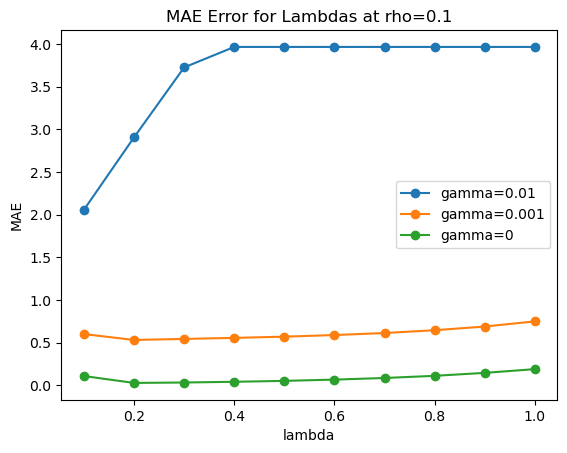

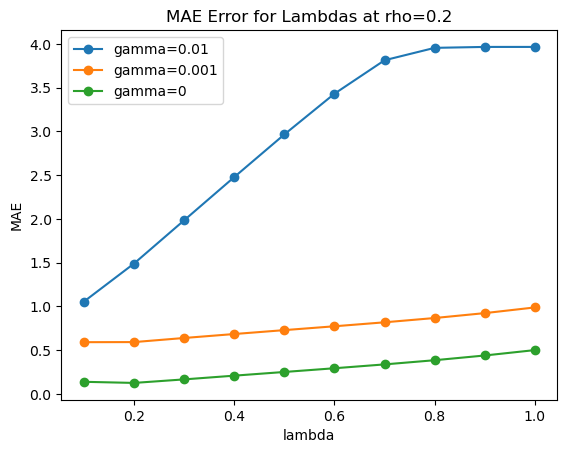

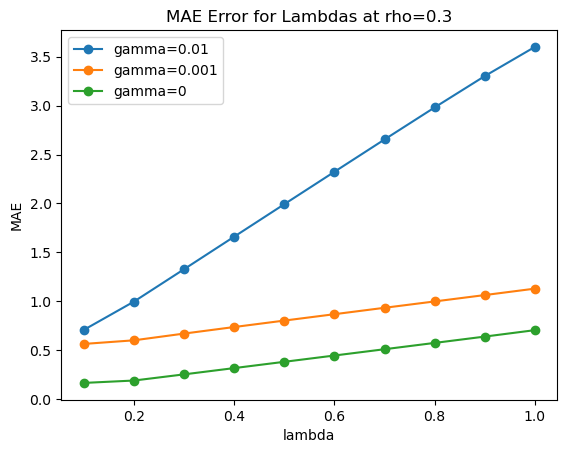

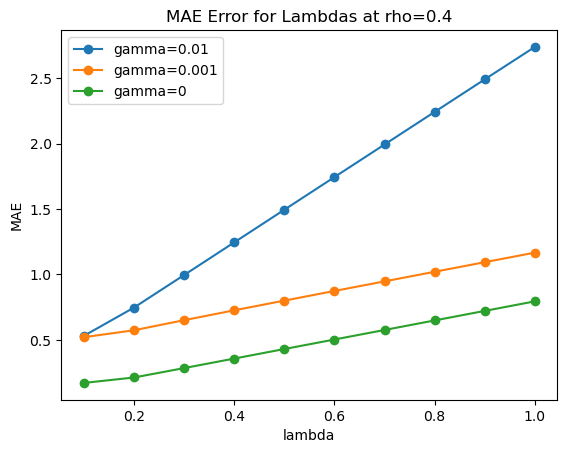

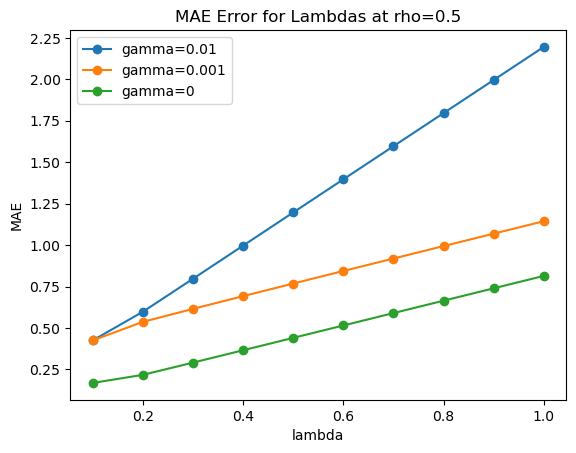

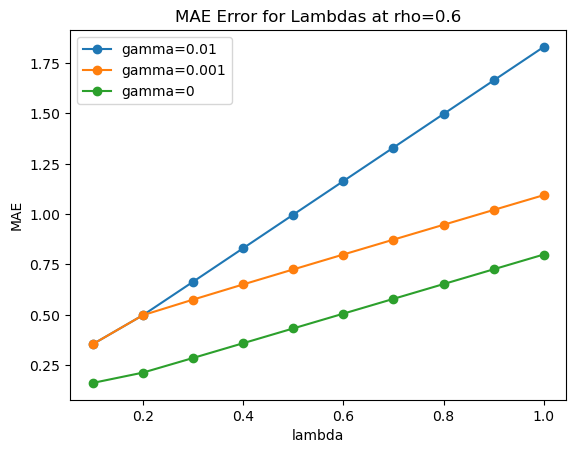

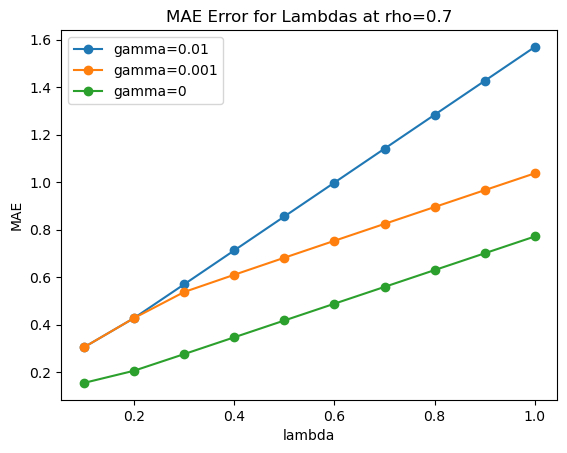

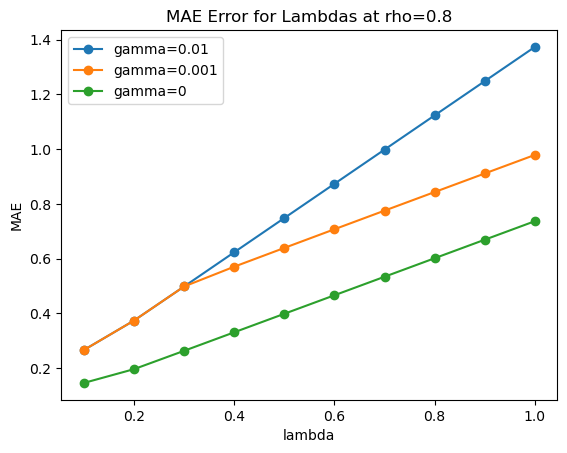

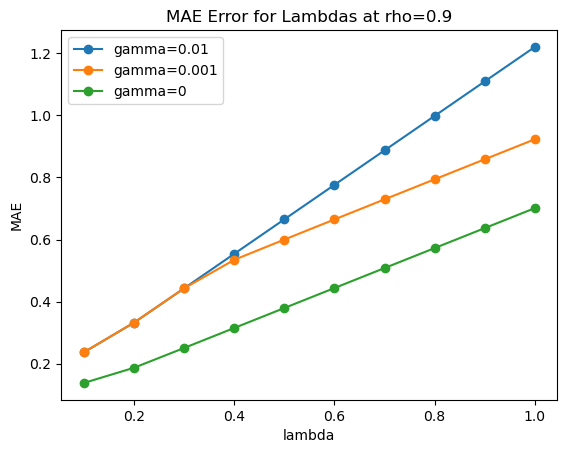

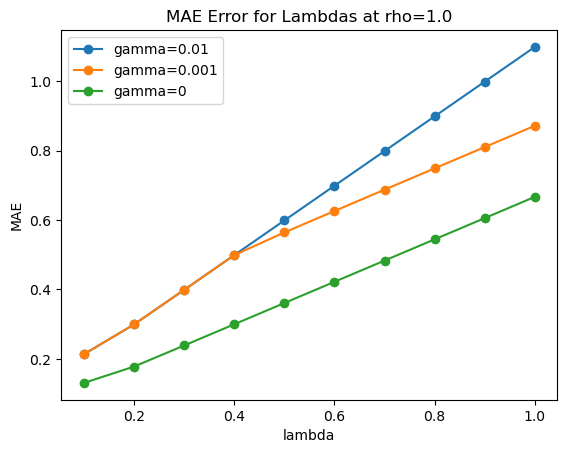

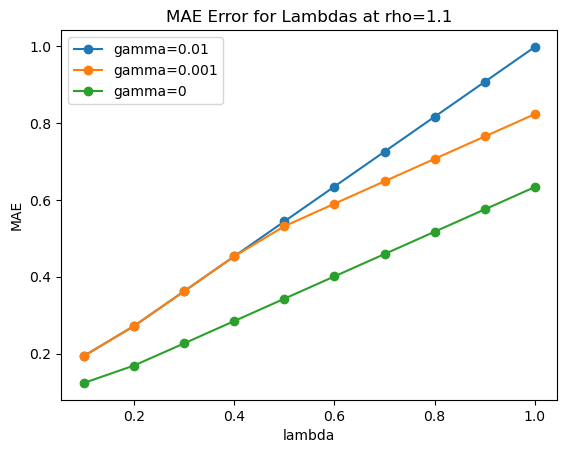

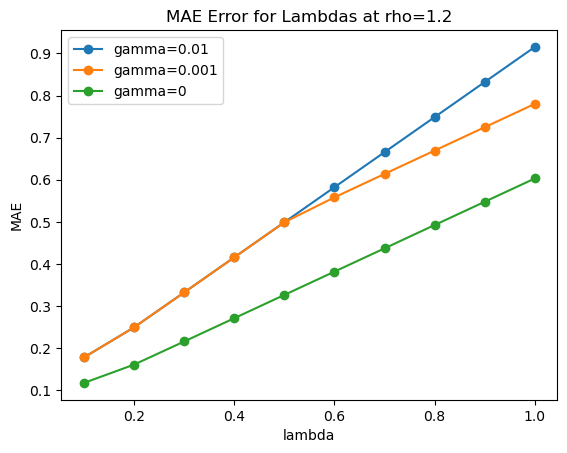

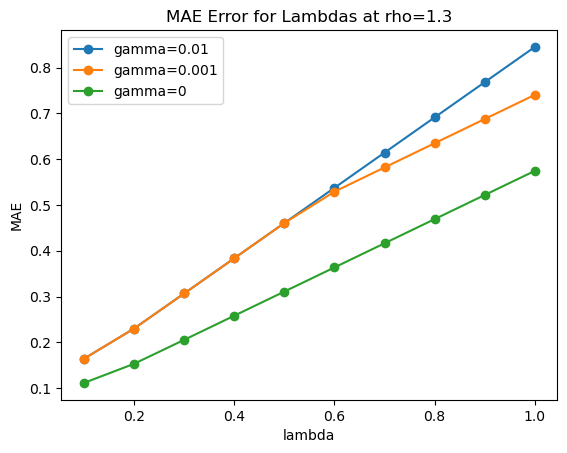

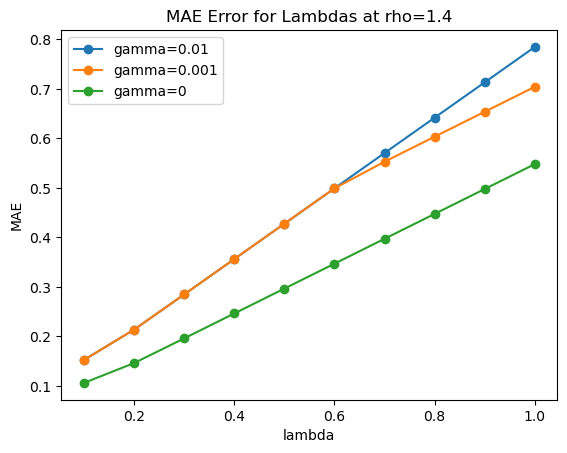

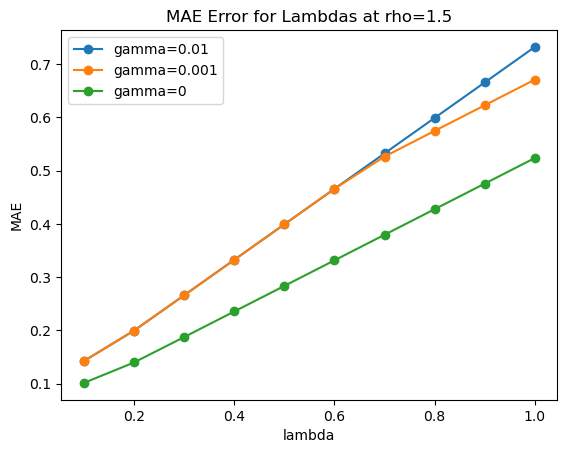

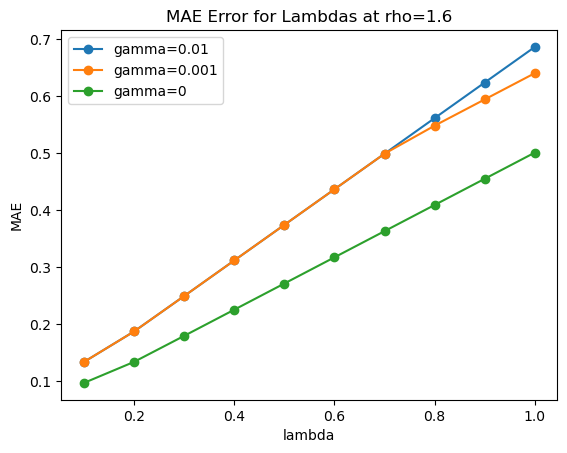

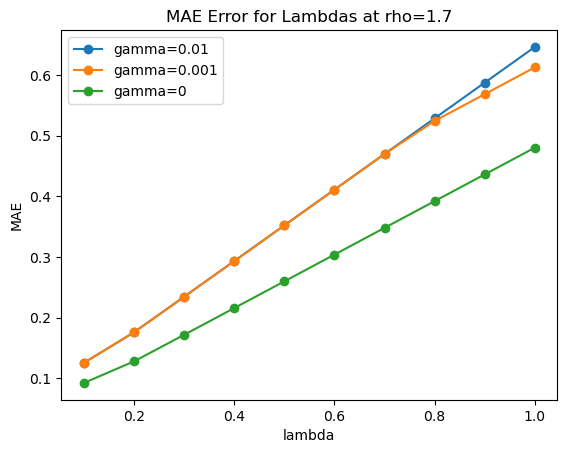

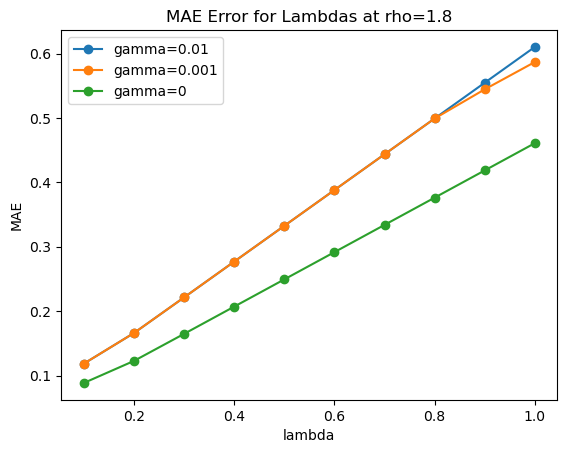

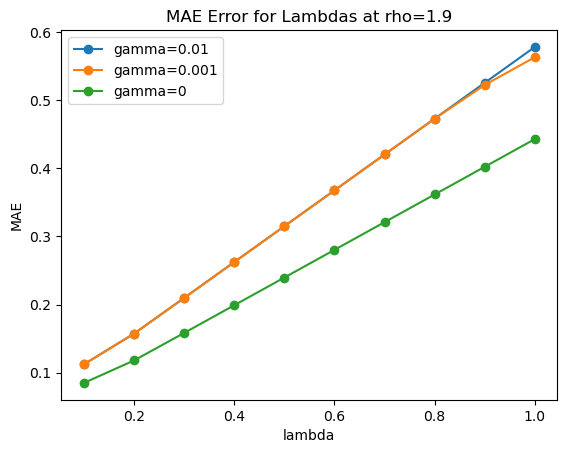

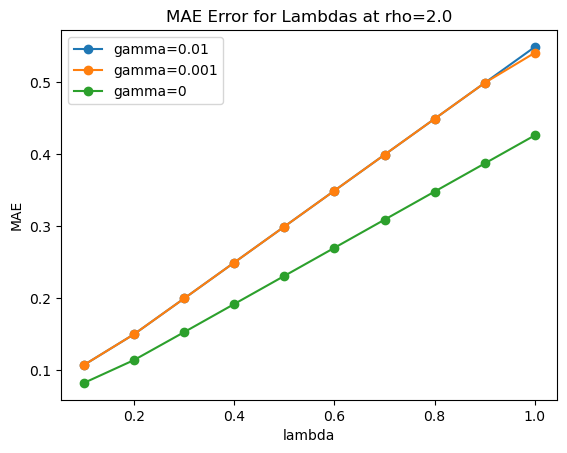

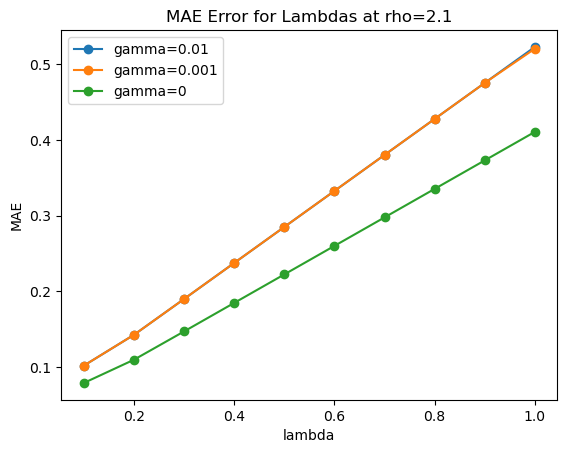

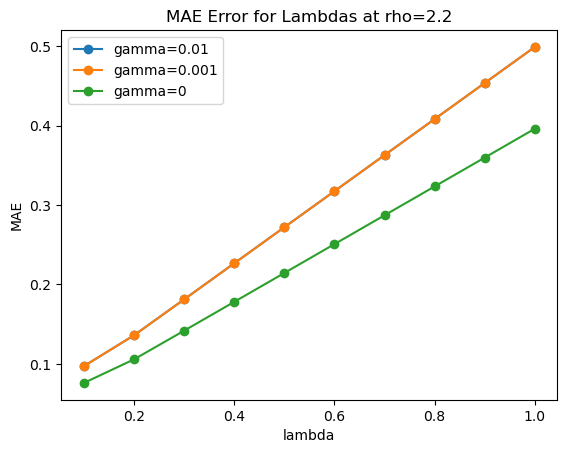

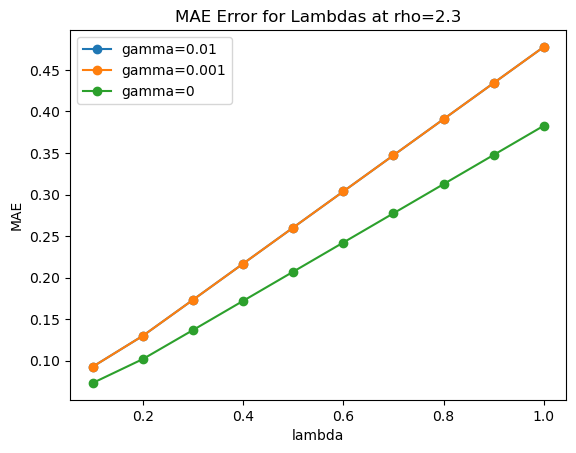

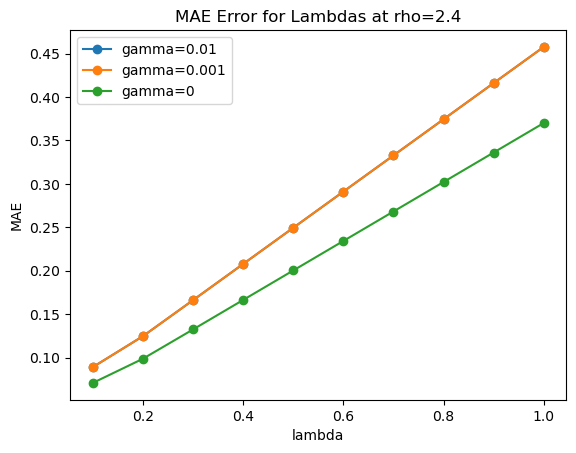

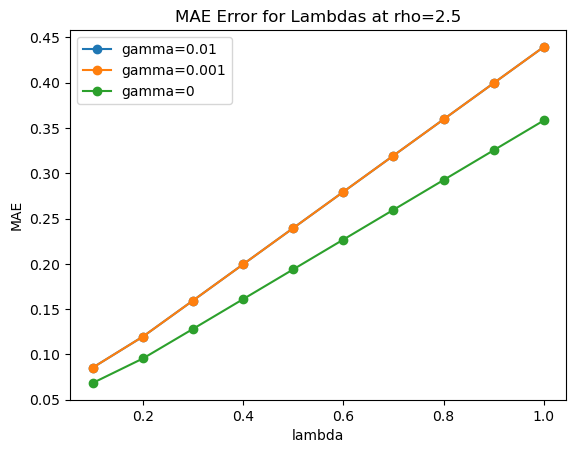

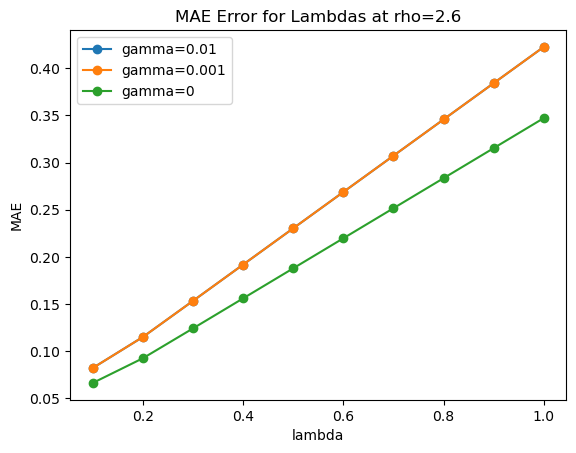

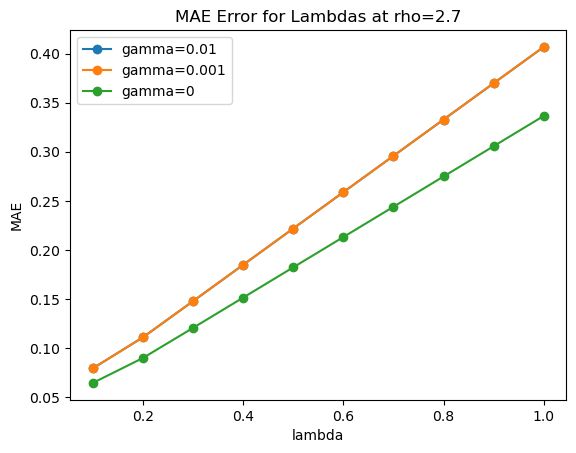

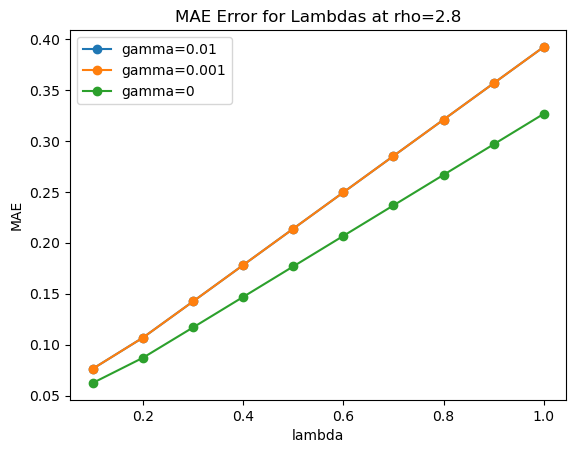

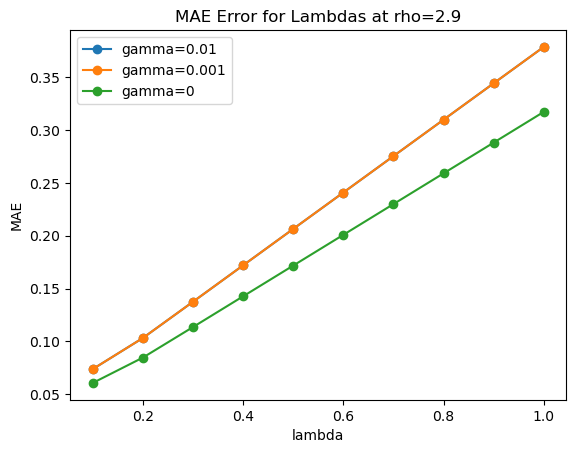

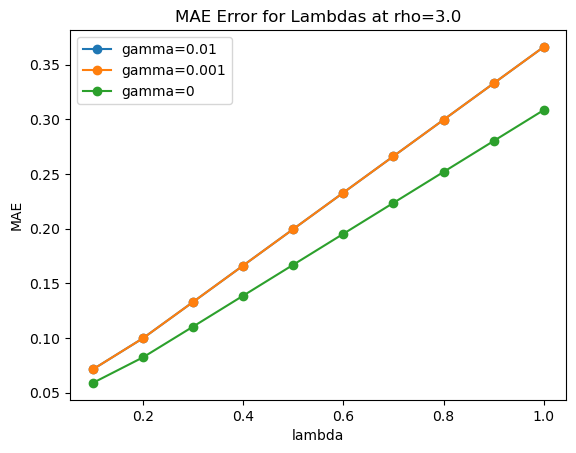

In [14]:
for rho in rhos:
    rhoCheckPlots(rho)
# rhoCheckPlots(.5)

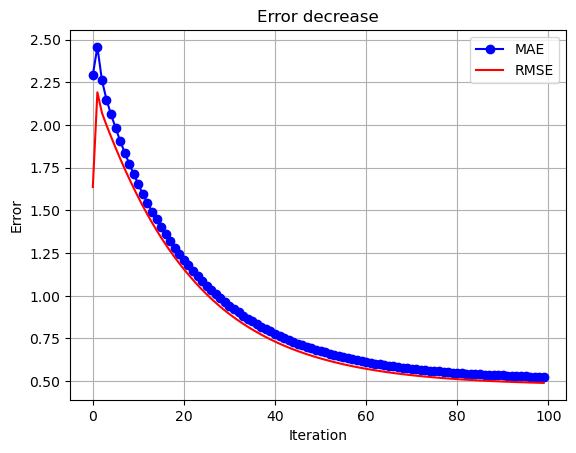

In [18]:
errorPlot(errors_array)